In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2001 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_01(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_s.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m01=Minuit(twi_minus_loglikelihood_01,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m01.migrad()

pprint(m01.fval)

FCN = 1544.9259895139214 
 TOTAL NCALL = 249 
 NCALLS = 249 
 
 
 EDM = 1.6623808336746207e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.20731,0.137428,,,-5,0,No
1,log_f_b,-3.5722,0.181722,,,-5,-2,No
2,alpha_H,2.346,0.133304,,,1,5,No
3,log_poisson,-0.825731,0.0574229,,,-3,3,No


1544.9259895139214


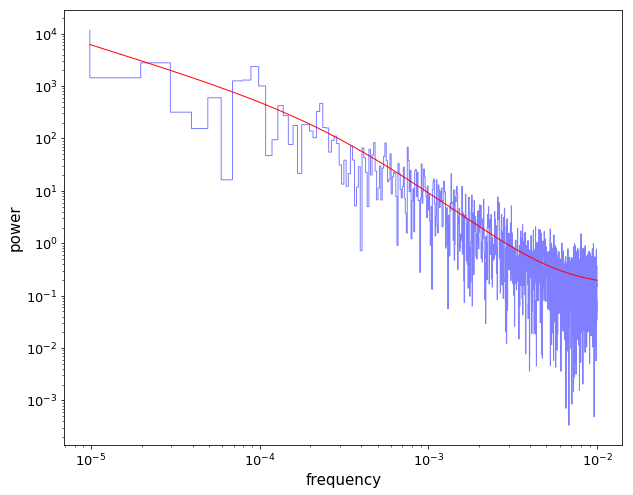

In [4]:
perdata01 = pd.read_csv("perlist01_s.csv")
f_01 = perdata01['f']
per_01 = perdata01['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m01.values[0],m01.values[1],m01.values[2],m01.values[3]

model_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_01.append(((f_01[i]**(-alpha_L))/(1+(f_01[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2001 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_01(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata01 = pd.read_csv("perlist01_s.csv")
    f = perdata01['f']
    per = perdata01['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata01)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n01=Minuit(twi_minus_loglikelihood_nobreak_01,log_A=-6,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-8,-2),limit_alpha=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

n01.migrad()

print(n01.fval)

FCN = 1560.2297990263135 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 7.266040530020815e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-5.09215,0.166033,,,-8,-2,No
1,alpha,1.99193,0.0579263,,,1,5,No
2,log_poisson,-0.977531,0.0741041,,,-2,3,No


1560.2297990263135


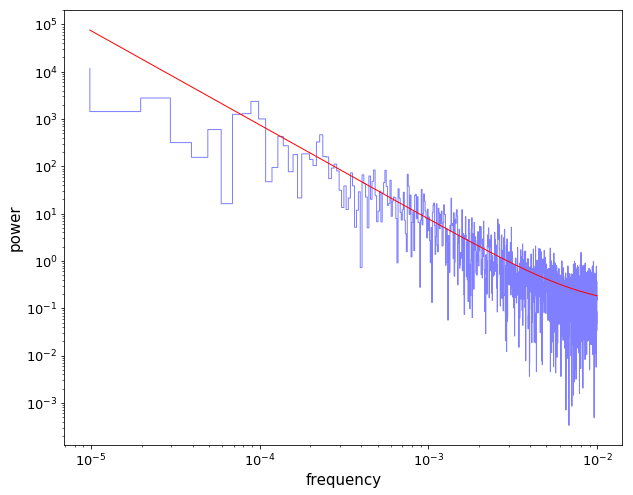

In [7]:
log_A,alpha,log_poisson = n01.values[0],n01.values[1],n01.values[2]

model_nob_01 = []
f_length_01 = len(f_01)
for i in range(f_length_01):
    model_nob_01.append((f_01[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_01, per_01, color="b", alpha=0.5, linewidth=1)
plt.plot(f_01, model_nob_01, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

15.303809512392036


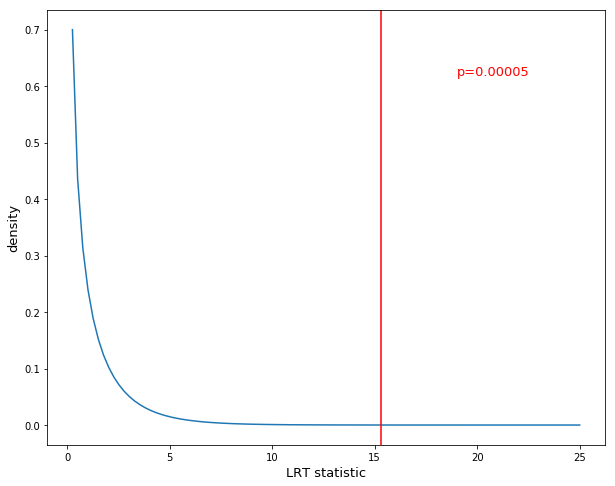

In [8]:
import scipy.stats as stats

# LRT statistic
T = n01.fval-m01.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2018(2) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_182(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata182 = pd.read_csv("perlist182_s.csv")
    f = perdata182['f']
    per = perdata182['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata182)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m182=Minuit(twi_minus_loglikelihood_182,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.01,error_log_poisson=0.1,
         limit_log_A=(-3,0), limit_log_f_b=(-7,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

m182.migrad()

pprint(m182.fval)

FCN = 2212.179811244377 
 TOTAL NCALL = 354 
 NCALLS = 354 
 
 
 EDM = 6.960201677225894e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.69137,0.0704791,,,-3,0,No
1,log_f_b,-2.93925,0.0771673,,,-7,-2,No
2,alpha_H,3.23158,0.363711,,,1,5,No
3,log_poisson,-0.243361,0.0323654,,,-3,3,No


2212.179811244377


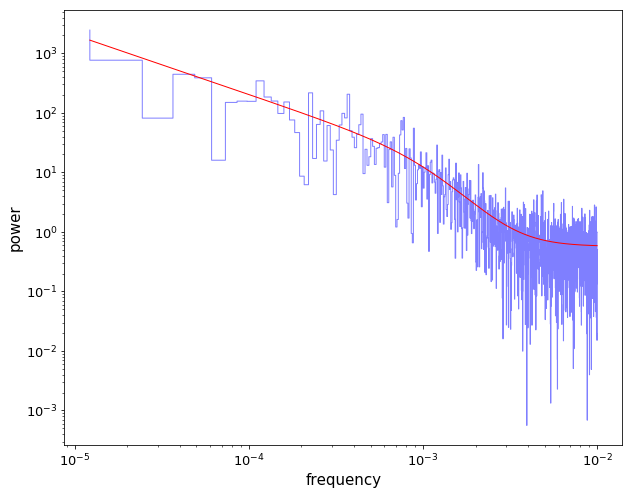

In [11]:
perdata182 = pd.read_csv("perlist182_s.csv")
f_182 = perdata182['f']
per_182 = perdata182['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m182.values[0],m182.values[1],m182.values[2],m182.values[3]

model_182 = []
f_length_182 = len(f_182)
for i in range(f_length_182):
    model_182.append(((f_182[i]**(-alpha_L))/(1+(f_182[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_182, per_182, color="b", alpha=0.5, linewidth=1)
plt.plot(f_182, model_182, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2018(2) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_182(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata182 = pd.read_csv("perlist182_s.csv")
    f = perdata182['f']
    per = perdata182['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata182)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n182=Minuit(twi_minus_loglikelihood_nobreak_182,log_A=-6,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-7,-2),limit_alpha=(1.0,5.0),limit_log_poisson=(-3,3),
         errordef=1)

n182.migrad()

pprint(n182.fval)

FCN = 2249.303392034881 
 TOTAL NCALL = 105 
 NCALLS = 105 
 
 
 EDM = 7.290279614319804e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-4.37456,0.234417,,,-7,-2,No
1,alpha,1.76626,0.0797635,,,1,5,No
2,log_poisson,-0.456311,0.060542,,,-3,3,No


2249.303392034881


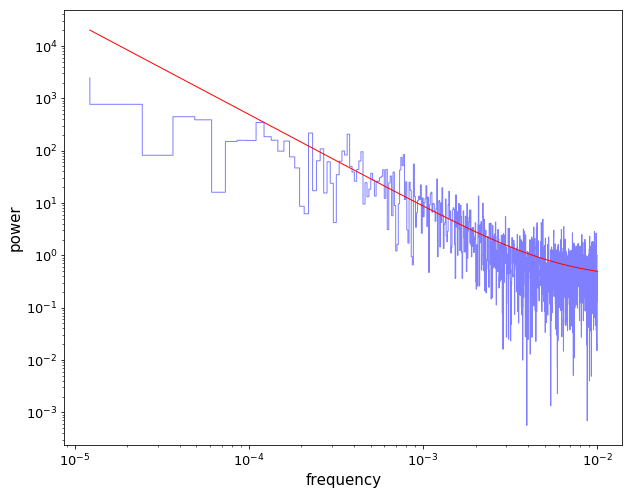

In [14]:
log_A,alpha,log_poisson = n182.values[0],n182.values[1],n182.values[2]

model_nob_182 = []
f_length_182 = len(f_182)
for i in range(f_length_182):
    model_nob_182.append((f_182[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_182, per_182, color="b", alpha=0.5, linewidth=1)
plt.plot(f_182, model_nob_182, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

37.12358079050409


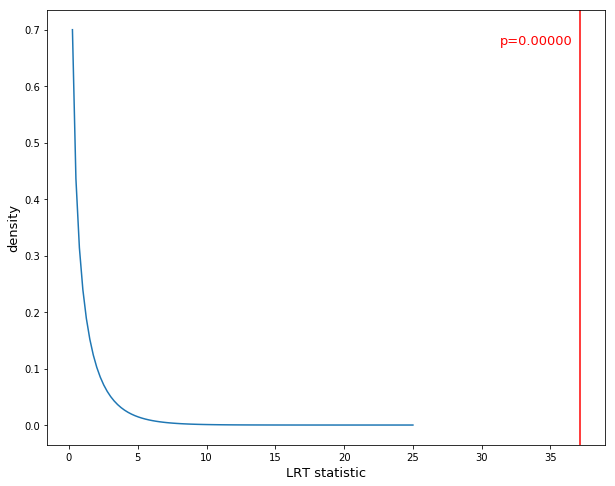

In [15]:
import scipy.stats as stats

# LRT statistic
T = n182.fval-m182.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [16]:
data01 = pd.read_csv("energy_ngc4051_01.csv")  
x01 = data01['x']
y01 = data01['y']
xerr01 = data01['xerr']
yerr01 = data01['yerr']

data182 = pd.read_csv("energy_ngc4051_182.csv")  
x182 = data182['x']
y182 = data182['y']
xerr182 = data182['xerr']
yerr182 = data182['yerr']

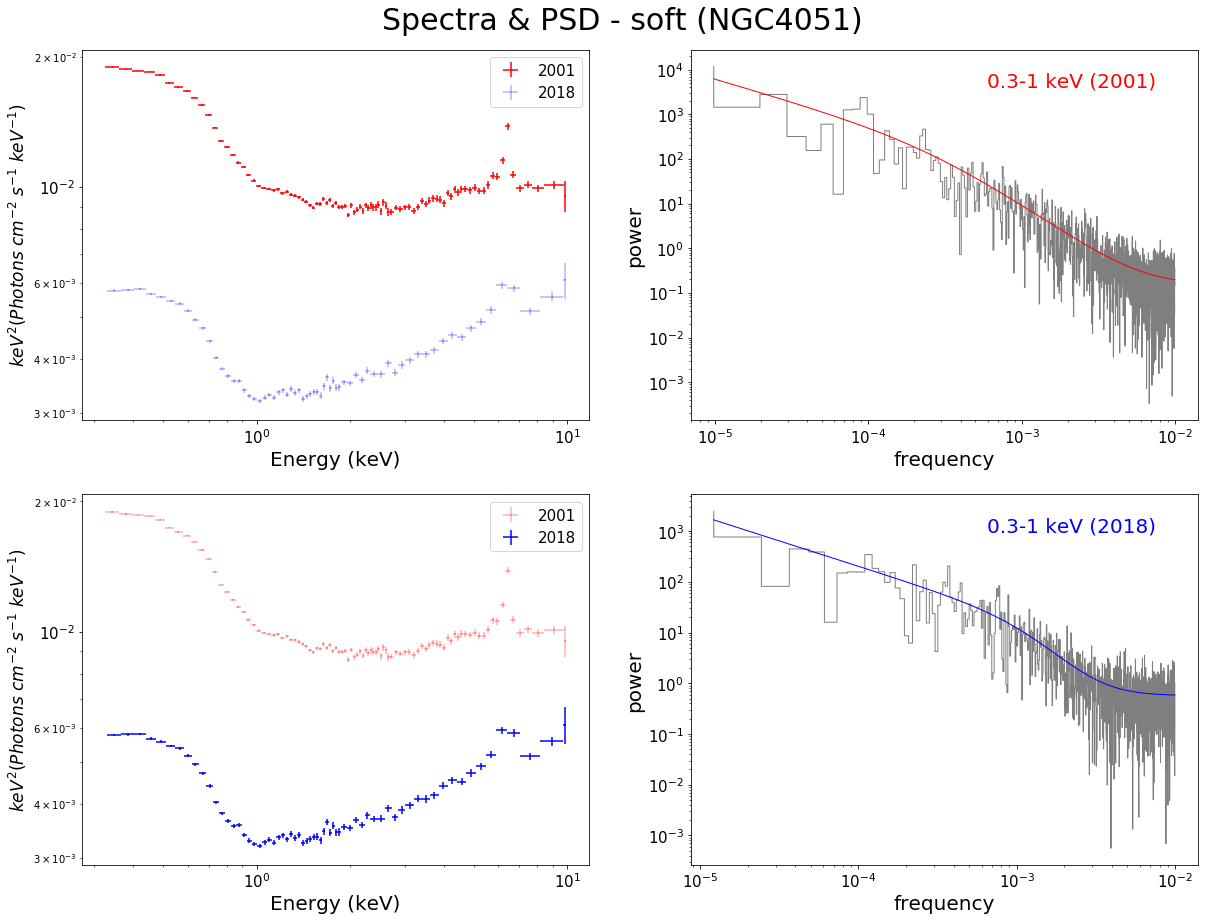

In [17]:
fig= plt.figure(figsize=(20,15))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


ax1.loglog()
ax1.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', label='2001')
ax1.errorbar(x182, y182, yerr=yerr182, xerr=xerr182, fmt=',b', alpha=0.3, label='2018')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x01, y01, yerr=yerr01, xerr=xerr01, fmt=',r', alpha=0.3, label='2001')
ax3.errorbar(x182, y182, yerr=yerr182, xerr=xerr182, fmt=',b', label='2018')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_01, per_01, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_01, model_01, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2001)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_182, per_182, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_182, model_182, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2018)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)


plt.suptitle("Spectra & PSD - soft (NGC4051)", x=0.5, y=0.92, fontsize=30)
plt.show()